<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LSTM-RF%20for%2010%20class%20classifications%20based%20on%20UNSW-NB15%20dataset%20ver.3(12222023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hybrid LSTM-RF for 10 class classifications based on UNSW-NB15 dataset ver.2**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_P2.2.csv")
dataset.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

**Data Preprocessing**

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=10)  # update to 10 classes
X = dataset.drop(['Class'], axis=1)
X = X.values
print(X.shape)
print(y.shape)

(175341, 40)
(175341, 10)


In [5]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Hybrid LSTM-RF for 10 class Ver.2**

In [7]:
# Train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(10, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

##lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=64)
##history = lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=64)
history = lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=64, validation_data=(X_test_lstm, y_test))

# Extract features from LSTM model
train_lstm_features = lstm_model.predict(X_train_lstm)
test_lstm_features = lstm_model.predict(X_test_lstm)

# Train RF model with LSTM features as input
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_lstm_features, np.argmax(y_train, axis=1))

# Evaluate hybrid model on test set
test_rf_features = rf_model.predict(test_lstm_features)

print(confusion_matrix(np.argmax(y_test, axis=1), test_rf_features))
print(classification_report(np.argmax(y_test, axis=1), test_rf_features))

Epoch 1/15
7000/7000 [==============================] - 83s 11ms/step - loss: 0.9412 - accuracy: 0.6429 - val_loss: 0.7959 - val_accuracy: 0.6883
Epoch 2/15
7000/7000 [==============================] - 72s 10ms/step - loss: 0.7833 - accuracy: 0.6949 - val_loss: 0.7482 - val_accuracy: 0.7022
Epoch 3/15
7000/7000 [==============================] - 75s 11ms/step - loss: 0.7422 - accuracy: 0.7082 - val_loss: 0.7183 - val_accuracy: 0.7114
Epoch 4/15
7000/7000 [==============================] - 73s 10ms/step - loss: 0.7177 - accuracy: 0.7161 - val_loss: 0.6875 - val_accuracy: 0.7194
Epoch 5/15
7000/7000 [==============================] - 75s 11ms/step - loss: 0.7006 - accuracy: 0.7215 - val_loss: 0.6812 - val_accuracy: 0.7239
Epoch 6/15
7000/7000 [==============================] - 75s 11ms/step - loss: 0.6879 - accuracy: 0.7257 - val_loss: 0.6937 - val_accuracy: 0.7234
Epoch 7/15
7000/7000 [==============================] - 71s 10ms/step - loss: 0.6778 - accuracy: 0.7290 - val_loss: 0.6632 -

In [9]:
# Compute TP, TN, FP, FN for each class
cm = confusion_matrix(np.argmax(y_test, axis=1), test_rf_features)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for each class
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

# Print FPR and TPR for each class
for i in range(10):
    print(f"Class {i} - FPR: {FPR[i]}, TPR: {TPR[i]}")

Class 0 - FPR: 0.006085998232777022, TPR: 0.8901303538175046
Class 1 - FPR: 0.05211758745045054, TPR: 0.5648417526227629
Class 2 - FPR: 0.059737037955842225, TPR: 0.5807572383073497
Class 3 - FPR: 0.06720512795070499, TPR: 0.43319368927711915
Class 4 - FPR: 0.03831067594808496, TPR: 0.6334425068602284
Class 5 - FPR: 0.015065558486898221, TPR: 0.8337211383569
Class 6 - FPR: 0.00030715573786734837, TPR: 0.9778761061946902
Class 7 - FPR: 0.010934758255593778, TPR: 0.7974660796118249
Class 8 - FPR: 0.007394338276108159, TPR: 0.9721922246220303
Class 9 - FPR: 0.002280614774417452, TPR: 0.9917488789237668


In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), test_rf_features)
recall = recall_score(np.argmax(y_test, axis=1), test_rf_features, average='weighted')
precision = precision_score(np.argmax(y_test, axis=1), test_rf_features, average='weighted')
f1score = f1_score(np.argmax(y_test, axis=1), test_rf_features, average='weighted')
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), test_rf_features)
classification_rep = classification_report(np.argmax(y_test, axis=1), test_rf_features)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1score)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7666160714285715
Recall: 0.7666160714285715
Precision: 0.7731514411950162
F1-Score: 0.7692878057685445
Confusion Matrix:
 [[10038    98     0    14    73  1012     1    20    21     0]
 [   19  6407  2747  1582   333    72     2   171    10     0]
 [    0  2365  6519  1562   348    79     7   265    66    14]
 [    9  1681  1859  4860  2366   107     8   204   109    16]
 [   47   421   488  2572  7156   125     4   245   124   115]
 [  525   223   275   352   249  9316     3    69   145    17]
 [    1     7    12    75   122    16 10829     1     5     6]
 [    5   444   613   597   332    60     0  8875   196     7]
 [    7     7    22    18    22    44     6   128 10803    55]
 [    0     0     4     1    13     4     0     0    70 11058]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92     11277
           1       0.55      0.56      0.56     11343
           2       0.52      0.58      0.55     

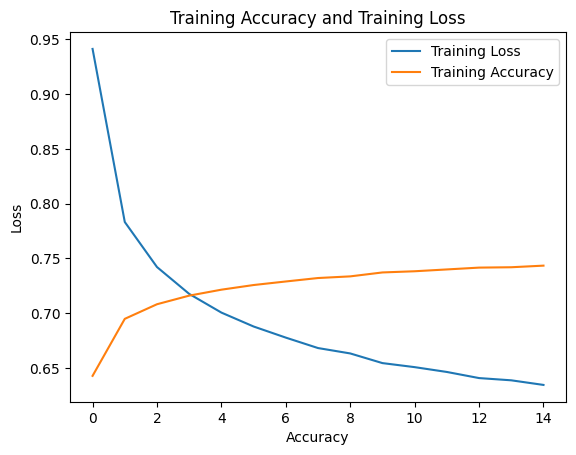

In [11]:
# Plot training loss and validation/test loss over each epoch of training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy and Training Loss')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend()

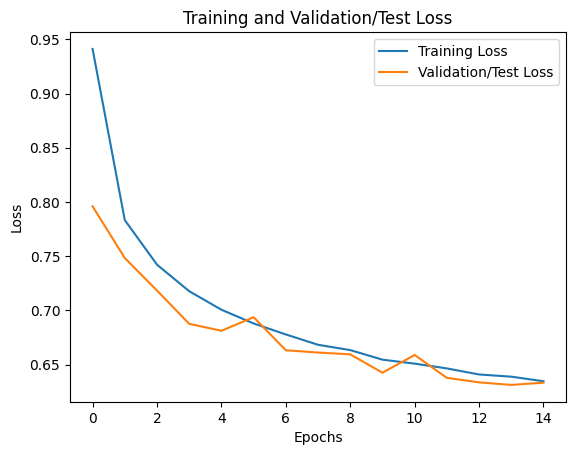

In [12]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.title('Training and Validation/Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='gist_earth')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])

  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees

  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid LSTM-RF Model


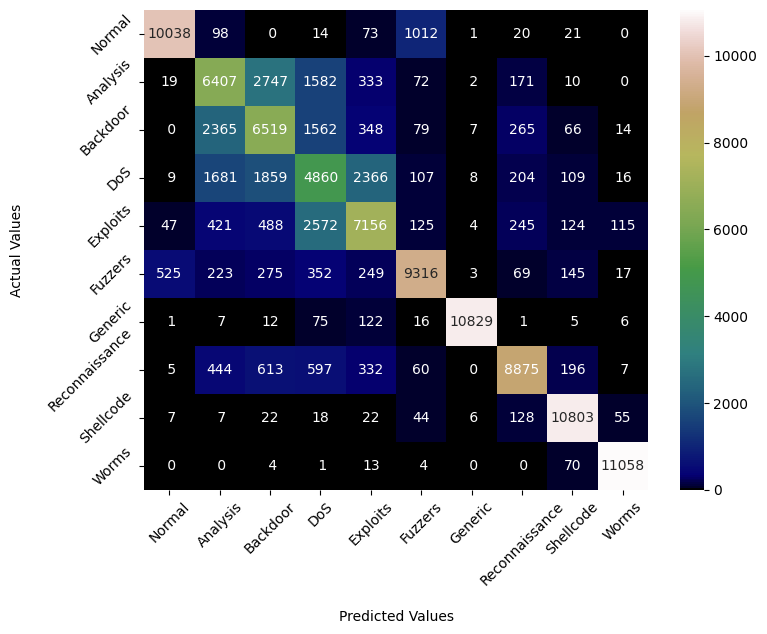

In [14]:
print("Confusion Matrix of Hybrid LSTM-RF Model")
conf_mat(np.argmax(y_test, axis=1), test_rf_features)

In [15]:
report = classification_report(np.argmax(y_test, axis=1), test_rf_features, output_dict=True)
detection_rates = {}
for cls in range(10):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates of Hybrid LSTM-RF Model:", detection_rates)

Detection rates of Hybrid LSTM-RF Model: {0: 0.8901303538175046, 1: 0.5648417526227629, 2: 0.5807572383073497, 3: 0.43319368927711915, 4: 0.6334425068602284, 5: 0.8337211383569, 6: 0.9778761061946902, 7: 0.7974660796118249, 8: 0.9721922246220303, 9: 0.9917488789237668}


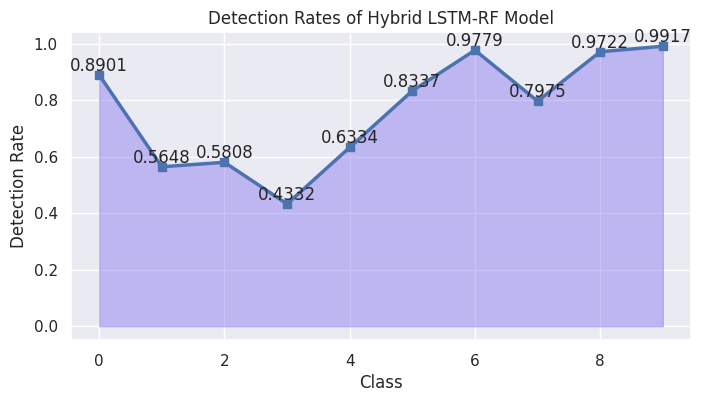

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

report = classification_report(np.argmax(y_test, axis=1), test_rf_features, output_dict=True)
detection_rates = {}
for cls in range(10):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']

# Extract the class labels and detection rates
labels = list(detection_rates.keys())
rates = list(detection_rates.values())

# Plot the line graph with filled area and labels
plt.figure(figsize=(8, 4))
plt.plot(labels, rates, marker='s', linestyle='-', linewidth=2.5)
plt.fill_between(labels, rates, color='mediumslateblue', alpha=0.4)

# Add labels to each data point
for i in range(len(labels)):
    plt.text(labels[i], rates[i], "{:.4f}".format(rates[i]), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Detection Rate')
plt.title('Detection Rates of Hybrid LSTM-RF Model')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

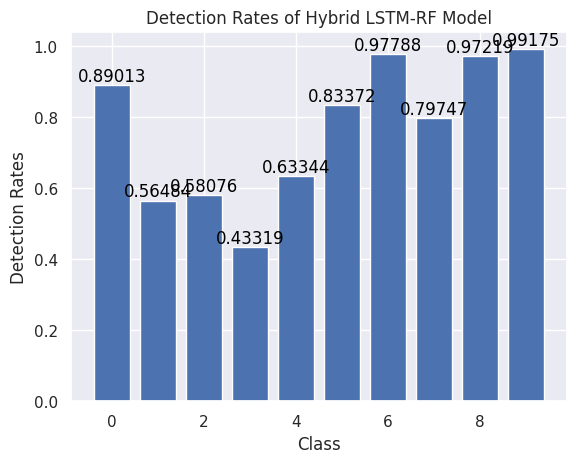

In [17]:
import matplotlib.pyplot as plt

# Extract the labels and rates from the detection rates dictionary
labels = list(detection_rates.keys())
rates = list(detection_rates.values())

# Plot the bar chart
plt.bar(labels, rates)

# Add labels and units to each bar
for i in range(len(labels)):
    plt.text(labels[i], rates[i], "{:.5f}".format(rates[i]), ha='center', va='bottom', color='black')

# Add axis labels and title
plt.xlabel('Class')
plt.ylabel('Detection Rates')
plt.title('Detection Rates of Hybrid LSTM-RF Model')

# Display the plot
plt.show()

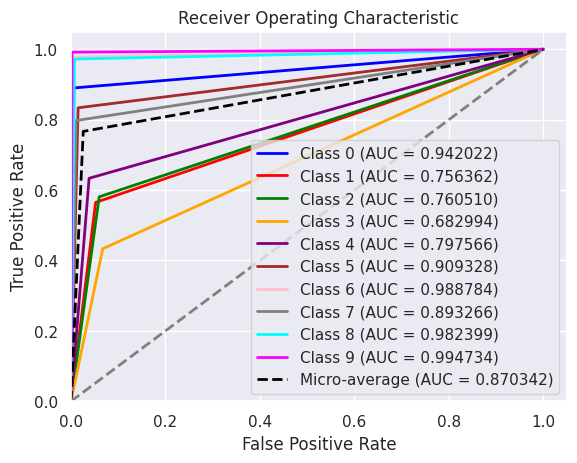

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#from keras.utils import np_utils

# Convert y_test and test_rf_features to one-hot encoded format
y_test_onehot = np_utils.to_categorical(np.argmax(y_test, axis=1))
test_rf_features_onehot = np_utils.to_categorical(test_rf_features, num_classes=10)  # Convert to one-hot encoded format with 10 classes

# Compute the AUC and ROC curves for each class
n_classes = y_test_onehot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], test_rf_features_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), test_rf_features_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']  # Adjust the colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.6f})'.format(i, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='black', lw=2, linestyle='--', label='Micro-average (AUC = {0:0.6f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print confusion matrix and classification report
##print(confusion_matrix(np.argmax(y_test_onehot, axis=1), np.argmax(test_rf_features_onehot, axis=1)))
##print(classification_report(np.argmax(y_test_onehot, axis=1), np.argmax(test_rf_features_onehot, axis=1)))